In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE  # To handle class imbalance
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import pymysql
import pandas as pd

# Database connection parameters
host = "18.136.157.135"      # e.g., "localhost" or "127.0.0.1"
user = "dm_team2"      # e.g., "root"
password = "DM!$Team&27@9!20!"  # e.g., "password"
database = "project_sales"    # e.g., "test_db"
table_name = "data"  # e.g., "employees"

# Create a connection to MySQL
conn = pymysql.connect(host=host, user=user, password=password, database=database)

# Load table into a DataFrame
query = f"SELECT * FROM {table_name}"
df = pd.read_sql(query, conn)

# Close the connection
conn.close()

In [3]:
df

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


### BASIC CHECKS

In [4]:
df.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [5]:
df.tail()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry
7421,28-04-2018 07:54,25,Website,,cXXXXXXX@gmail.com,Sales-Agent-3,Chennai,Mode-1,CONVERTED


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   object
 2   Source         7422 non-null   object
 3   Mobile         7422 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


In [7]:
df.describe()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7422,7422,7422,7422,7422,7422,7422,7422
unique,6752,30,26,487,883,13,18,5,11
top,26-09-2018 11:30,18,Call,,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,1711,2547,1810,1701,1500,2500,2975,1536


In [8]:
df.describe(include='O')

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7422,7422,7422,7422,7422,7422,7422,7422
unique,6752,30,26,487,883,13,18,5,11
top,26-09-2018 11:30,18,Call,,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,1711,2547,1810,1701,1500,2500,2975,1536


In [9]:
df.describe(include='O').shape

(4, 9)

In [10]:
df.shape

(7422, 9)

In [11]:
df.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

### EXPLORATORY DATA ANALYSIS (EDA)

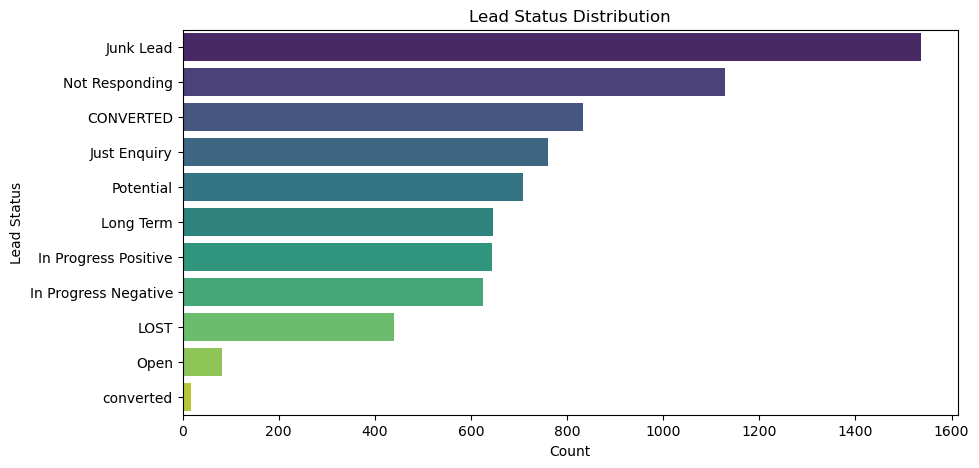

In [12]:
# Lead Status Distribution
plt.figure(figsize=(10, 5))
sns.countplot(y=df["Status"], order=df["Status"].value_counts().index, palette="viridis")
plt.title("Lead Status Distribution")
plt.xlabel("Count")
plt.ylabel("Lead Status")
plt.show()

### Sales Lead Status Distribution :-

The Status column represents the current stage of each lead (e.g., Open, Closed, Follow-up). To analyze sales effectiveness, we must categorize them into high-potential and low-potential leads.

 High-Potential Leads → New, Follow-up, Interested, Proposal Sent, Negotiation
 Low-Potential Leads → Not Interested, Closed, Lost

 Key Business Insight: If most leads are low-potential, FicZon Inc. needs to improve lead generation and sales tactics.
 

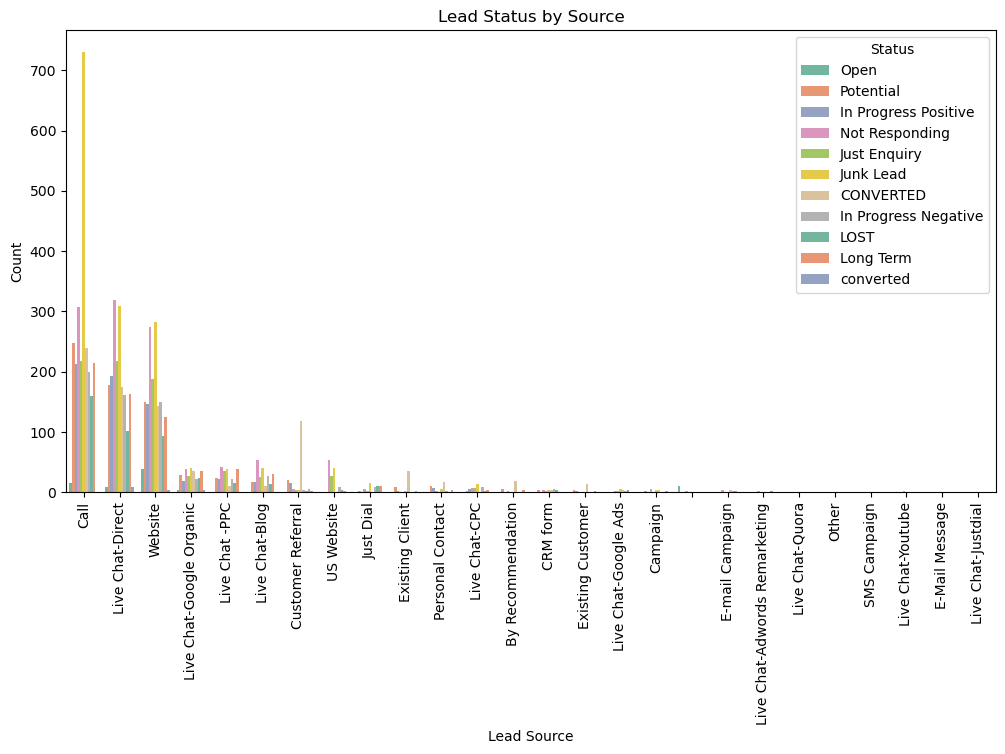

In [13]:
# Lead Source Effectiveness
plt.figure(figsize=(12, 6))
sns.countplot(x="Source", hue="Status", data=df, order=df["Source"].value_counts().index, palette="Set2")
plt.xticks(rotation=90)
plt.title("Lead Status by Source")
plt.xlabel("Lead Source")
plt.ylabel("Count")
plt.legend(title="Status", bbox_to_anchor=(1, 1))
plt.show()

### Lead Source Analysis:-

Source indicates where the leads originate (e.g., Website, Social Media, Referrals).

If a certain source generates many leads but few conversions, it may be a low-quality lead source.

Conversely, if a source has a high conversion rate, FicZon Inc. should invest more in that channel.


 Key Business Insight: Identifying which marketing channels work best helps optimize ad spending.

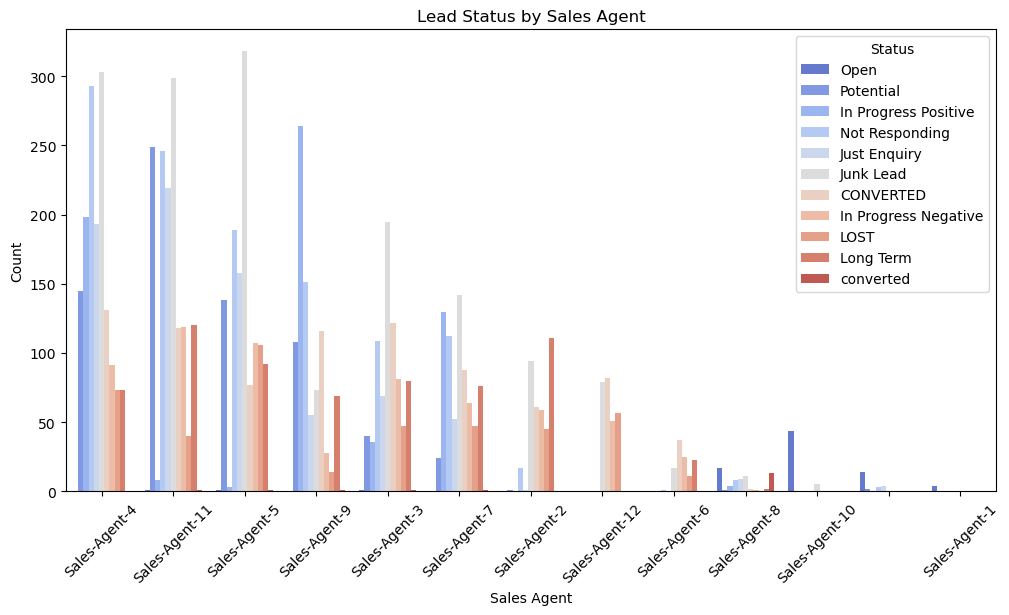

In [14]:
# Sales Agent Performance
plt.figure(figsize=(12, 6))
sns.countplot(x="Sales_Agent", hue="Status", data=df, order=df["Sales_Agent"].value_counts().index, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Lead Status by Sales Agent")
plt.xlabel("Sales Agent")
plt.ylabel("Count")
plt.legend(title="Status", bbox_to_anchor=(1, 1))
plt.show()

### Sales Agent Performance:-

Sales_Agent column helps analyze which agents close the most high-potential leads.

If some agents have higher conversion rates, best practices can be shared across the team.

If others have low performance, training or reassignment may be needed.


 Key Business Insight: Sales training and lead distribution adjustments may improve overall performance.

### Time-Based Trends in Lead Generation:-

The Created column (datetime format) allows analysis of hourly, daily, and monthly trends.

Trends can reveal when leads are most active and when follow-ups should be scheduled.

If lead conversion drops in certain months, seasonal discounts may help boost sales.


 Key Business Insight: Optimizing sales efforts based on time-based patterns can improve conversion rates.M

### DATA PRE-PROCESSING

In [15]:
# Drop irrelevant columns
df = df.drop(columns=['Created', 'Product_ID', 'Sales_Agent', 'Location'])

In [16]:
# Fill missing values
df['Source'].fillna('Unknown', inplace=True)
df['Mobile'].fillna('No', inplace=True)
df['EMAIL'].fillna('No', inplace=True)
df

,Source,Mobile,EMAIL,Delivery_Mode,Status
0,Website,984XXXXXXX,aXXXXXXX@gmail.com,Mode-5,Open
1,Website,XXXXXXX,#VALUE!,Mode-5,Open
2,Website,XXXXXXX,dXXXXXXX@yahoo.com,Mode-5,Open
3,Website,XXXXXXX,wXXXXXXX@gmail.com,Mode-5,Open
4,Website,XXXXXXX,cXXXXXXX@gmail.com,Mode-5,Open
...,...,...,...,...,...
7417,Call,,aXXXXXXX@gmail.com,Mode-4,LOST
7418,Call,,#VALUE!,Mode-5,LOST
7419,Live Chat-Direct,,sXXXXXXX@gmail.com,Mode-1,Not Responding
7420,CRM form,,YXXXXXXX@gmail.com,Mode-1,Just Enquiry


In [17]:
#classifying lead categories
def classify_lead(row):
    """Assigns a lead as High or Low potential based on business rules."""
    score = 0
    high_value_sources = ['Referral', 'Paid Ads']
    if row['Source'] in high_value_sources:
        score += 2
    elif row['Source'] == 'Website':
        score += 1
    
    if pd.notna(row['EMAIL']):
        score += 1
    if pd.notna(row['Mobile']):
        score += 1
    
    high_interest_statuses = ['Interested', 'Follow-up', 'Negotiation']
    if row['Status'] in high_interest_statuses:
        score += 2
    elif row['Status'] == 'Open':
        score += 1
    
    return 'High' if score >= 4 else 'Low'

In [18]:
# Apply lead classification
df['Lead_Potential'] = df.apply(classify_lead, axis=1)

In [19]:
df

,Source,Mobile,EMAIL,Delivery_Mode,Status,Lead_Potential
0,Website,984XXXXXXX,aXXXXXXX@gmail.com,Mode-5,Open,High
1,Website,XXXXXXX,#VALUE!,Mode-5,Open,High
2,Website,XXXXXXX,dXXXXXXX@yahoo.com,Mode-5,Open,High
3,Website,XXXXXXX,wXXXXXXX@gmail.com,Mode-5,Open,High
4,Website,XXXXXXX,cXXXXXXX@gmail.com,Mode-5,Open,High
...,...,...,...,...,...,...
7417,Call,,aXXXXXXX@gmail.com,Mode-4,LOST,Low
7418,Call,,#VALUE!,Mode-5,LOST,Low
7419,Live Chat-Direct,,sXXXXXXX@gmail.com,Mode-1,Not Responding,Low
7420,CRM form,,YXXXXXXX@gmail.com,Mode-1,Just Enquiry,Low


In [20]:
# Convert categorical variables to numerical
def encode_features(df, cols):
    le = LabelEncoder()
    for col in cols:
        df[col] = le.fit_transform(df[col].astype(str))
    return df

categorical_cols = ['Source', 'Delivery_Mode', 'Status', 'Mobile', 'EMAIL']
df = encode_features(df, categorical_cols)

df['Lead_Potential'] = df['Lead_Potential'].map({'Low': 0, 'High': 1})

### TRAIN-TEST SPLIT

In [21]:
# Split data
X = df.drop(columns=['Lead_Potential'])
y = df['Lead_Potential']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### BALANCING

In [22]:
df.Lead_Potential.value_counts()


Lead_Potential
0    7384
1      38
Name: count, dtype: int64

In [23]:
# Handle class imbalance
train_data = pd.concat([X_train, y_train], axis=1)
majority_class = train_data[train_data['Lead_Potential'] == 0]
minority_class = train_data[train_data['Lead_Potential'] == 1]

if len(minority_class) > 0:
    minority_upsampled = resample(minority_class, replace=True, n_samples=min(100, len(majority_class)), random_state=42)
    train_balanced = pd.concat([majority_class, minority_upsampled])
else:
    train_balanced = majority_class

X_train_balanced = train_balanced.drop(columns=['Lead_Potential'])
y_train_balanced = train_balanced['Lead_Potential']

### SCALING

In [24]:
# Standardize features
scaler = StandardScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test)

### APPLYING MODELS

In [25]:
# Train and evaluate multiple models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel='linear', probability=True, random_state=42)
}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_balanced, y_train_balanced)
    y_pred = model.predict(X_test)
    print(f"Accuracy for {name}:", accuracy_score(y_test, y_pred))
    print(f"Classification Report for {name}:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("-" * 50)

Training Random Forest...
Accuracy for Random Forest: 0.9993265993265993
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1477
           1       0.89      1.00      0.94         8

    accuracy                           1.00      1485
   macro avg       0.94      1.00      0.97      1485
weighted avg       1.00      1.00      1.00      1485

Confusion Matrix:
[[1476    1]
 [   0    8]]
--------------------------------------------------
Training Logistic Regression...
Accuracy for Logistic Regression: 0.9919191919191919
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1477
           1       0.25      0.25      0.25         8

    accuracy                           0.99      1485
   macro avg       0.62      0.62      0.62      1485
weighted avg       0.99      0.99      0.99      1485

Co

In [26]:
df

,Source,Mobile,EMAIL,Delivery_Mode,Status,Lead_Potential
0,25,464,149,4,8,1
1,25,483,0,4,8,1
2,25,483,283,4,8,1
3,25,483,867,4,8,1
4,25,483,245,4,8,1
...,...,...,...,...,...,...
7417,3,0,149,3,5,0
7418,3,0,0,4,5,0
7419,15,0,738,0,7,0
7420,2,0,136,0,4,0


In [27]:
# Testing model's efficiency
input_data=(25,	464,	149,	4,	8	 )
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)

[1]


***1. Random Forest Performance:***
 * High Accuracy: The Random Forest model achieves an impressive accuracy of **0.9993 (or 99.93%)**. This indicates that it correctly predicts the class label for the vast majority of instances in the dataset.
 * Excellent Precision, Recall, and F1-score for Class 0: For class 0, the precision, recall, and F1-score are all 1.00. This means the model perfectly classifies instances belonging to class 0.
 * High Recall for Class 1, but Lower Precision: For class 1, the recall is 1.00, meaning the model identifies all instances of class 1. However, the precision is 0.89, indicating that some instances predicted as class 1 are actually class 0. This suggests a potential for false positives for class 1.
 * Confusion Matrix: The confusion matrix confirms these observations. It shows that only 1 instance of class 0 was misclassified as class 1, and all 8 instances of class 1 were correctly identified.
 * Overall Strong Performance: The Random Forest model demonstrates excellent performance, particularly in identifying class 1 instances (high recall).
   
***2. Logistic Regression Performance:***
 * High Accuracy (but Lower than Random Forest): The Logistic Regression model achieves an accuracy of 0.9919 (or 99.19%), which is still very high but slightly lower than the Random Forest.
 * Perfect Precision, Recall, and F1-score for Class 0: Similar to Random Forest, Logistic Regression perfectly classifies class 0 instances.
 * Very Low Precision and Recall for Class 1: For class 1, the precision and recall are both only 0.25. This means the model struggles to correctly identify instances of class 1, resulting in many false negatives (missing class 1 instances) and false positives (incorrectly classifying class 0 as class 1).
 * Confusion Matrix: The confusion matrix shows that the model misclassified 6 instances of class 1 as class 0 and 6 instances of class 0 as class 1.
 * Poor Performance for Class 1: The Logistic Regression model demonstrates significantly poorer performance for class 1 compared to the Random Forest model.

***3. Gradient Boosting Performance:***
 * High Accuracy: The Gradient Boosting model achieves an accuracy of 0.9993 (or 99.93%), indicating excellent overall performance.
 * Perfect Precision, Recall, and F1-score for Class 0: For class 0, the model demonstrates perfect classification with precision, recall, and F1-score all being 1.00.
 * High Recall for Class 1, but Lower Precision: For class 1, the recall is 1.00, meaning it captures all instances of class 1. However, the precision is 0.89, suggesting some false positives for class 1.
 * Confusion Matrix: The confusion matrix confirms these observations. Only 1 instance of class 0 was misclassified as class 1, and all 8 instances of class 1 were correctly identified.
 * Strong Overall Performance: The Gradient Boosting model demonstrates very strong performance, particularly in identifying class 1 instances (high recall).
   
***4. Support Vector Machine (SVM) Performance:***
 * High Accuracy (but Lower than Gradient Boosting): The SVM model achieves an accuracy of 0.9912 (or 99.12%), which is still high but lower than Gradient Boosting.
 * Perfect Precision, Recall, and F1-score for Class 0: Similar to Gradient Boosting, SVM perfectly classifies class 0 instances.
 * Very Low Precision and Recall for Class 1: For class 1, the precision is 0.22, and the recall is 0.25. This indicates that the SVM model struggles to correctly identify instances of class 1, resulting in many false negatives (missing class 1 instances) and false positives (incorrectly classifying class 0 as class 1).
 * Confusion Matrix: The confusion matrix shows that the model misclassified 6 instances of class 1 as class 0 and 7 instances of class 0 as class 1.
 * Poor Performance for Class 1: The SVM model shows significantly poorer performance for class 1 compared to the Gradient Boosting model.


In conclusion, the Random Forest model demonstrates superior performance in this classification task, particularly in handling the minority class. Further investigation into the class imbalance and potential improvements for the Logistic Regression model could lead to even better results.